In [4]:
# In this Project we perform exploratory data analysis on economies data set. 

# Level 0 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Economies for Rohan Tyagi.csv')
df.head()

,econ_id,code,year,income_group,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports
0,1,AFG,2010,Low income,539.667,37.133,2.179,30.402,NaN,46.394,24.381
1,2,AFG,2015,Low income,615.091,21.466,-1.549,18.602,NaN,-49.110,-7.294
2,3,AGO,2010,Upper middle income,3599.270,23.534,14.480,14.433,NaN,-3.266,-21.076
3,4,AGO,2015,Upper middle income,3876.200,-0.425,10.287,9.552,NaN,6.721,-21.778
4,5,ALB,2010,Upper middle income,4098.130,20.011,3.605,31.305,14.0,10.645,-8.013


In [7]:
df.shape

(380, 11)

In [8]:
df.size

4180

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   econ_id            380 non-null    int64  
 1   code               380 non-null    object 
 2   year               380 non-null    int64  
 3   income_group       380 non-null    object 
 4   gdp_percapita      378 non-null    float64
 5   gross_savings      338 non-null    float64
 6   inflation_rate     377 non-null    float64
 7   total_investment   344 non-null    float64
 8   unemployment_rate  217 non-null    float64
 9   exports            351 non-null    float64
 10  imports            349 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 32.8+ KB


In [10]:
df.describe()

,econ_id,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports
count,380.000000,380.000000,378.000000,338.000000,377.000000,344.000000,217.000000,351.000000,349.000000
mean,190.500000,2012.500000,12982.281810,20.618538,4.384159,24.394640,8.715097,6.019108,6.179536
std,109.840794,2.503296,18035.726916,11.167362,8.341782,9.973677,5.379263,14.777802,14.787957
min,1.000000,2010.000000,242.840000,-11.014000,-3.900000,1.779000,0.827000,-49.110000,-31.234000
25%,95.750000,2010.000000,1534.285000,13.907750,0.951000,18.523750,5.092000,-0.352000,-1.168000
50%,190.500000,2012.500000,4972.675000,19.954500,2.763000,22.611000,7.483000,5.551000,5.637000
75%,285.250000,2015.000000,15653.542500,26.294250,5.824000,27.311250,10.367000,11.460000,12.225000
max,380.000000,2015.000000,105573.580000,54.939000,121.738000,74.170000,32.050000,175.541000,108.436000


In [11]:
df.dtypes

econ_id                int64
code                  object
year                   int64
income_group          object
gdp_percapita        float64
gross_savings        float64
inflation_rate       float64
total_investment     float64
unemployment_rate    float64
exports              float64
imports              float64
dtype: object

In [12]:
df.columns

Index(['econ_id', 'code', 'year', 'income_group', 'gdp_percapita',
       'gross_savings', 'inflation_rate', 'total_investment',
       'unemployment_rate', 'exports', 'imports'],
      dtype='object')

In [13]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

In [14]:
print(numerical_columns.columns)
print(categorical_columns.columns)

Index(['econ_id', 'year', 'gdp_percapita', 'gross_savings', 'inflation_rate',
       'total_investment', 'unemployment_rate', 'exports', 'imports'],
      dtype='object')
Index(['code', 'income_group'], dtype='object')


In [15]:
#We have seen in dataset that year is numerical column but year should be categorical .

In [16]:
df['year'] = df['year'].astype('category')

In [17]:
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object','category'])

In [18]:
print(numerical_columns.columns)
print(categorical_columns.columns)

Index(['econ_id', 'gdp_percapita', 'gross_savings', 'inflation_rate',
       'total_investment', 'unemployment_rate', 'exports', 'imports'],
      dtype='object')
Index(['code', 'year', 'income_group'], dtype='object')


In [19]:
df['code'].value_counts()

AFG    2
NZL    2
MYS    2
NAM    2
NER    2
      ..
GNQ    2
GRC    2
GRD    2
GTM    2
ZWE    2
Name: code, Length: 190, dtype: int64

In [20]:
df['year'].value_counts()

2010    190
2015    190
Name: year, dtype: int64

In [21]:
df['income_group'].value_counts()

High income            114
Upper middle income    108
Lower middle income    100
Low income              58
Name: income_group, dtype: int64

# Level 1

In [22]:
df = df.rename(columns={'code':'country_code'})

In [23]:
df.duplicated().sum()

0

# Dealing With Null Values

In [24]:
df.isnull().sum()

econ_id                0
country_code           0
year                   0
income_group           0
gdp_percapita          2
gross_savings         42
inflation_rate         3
total_investment      36
unemployment_rate    163
exports               29
imports               31
dtype: int64

In [25]:
df['gdp_percapita'].fillna(df['gdp_percapita'].mean(),inplace=True)

In [26]:
df.dropna(subset=['gross_savings'],axis=0,inplace=True)

In [27]:
df['inflation_rate'].fillna(df['inflation_rate'].mode()[0],inplace=True)

In [28]:
df['total_investment'].fillna(df['total_investment'].mean(),inplace=True)

In [29]:
df['unemployment_rate'].fillna(df['unemployment_rate'].mean(),inplace=True)

In [30]:
df[df['exports'].isnull()]

,econ_id,country_code,year,income_group,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports
158,159,IRQ,2010,Upper middle income,4473.710,23.736,2.445,24.374374,8.747361,NaN,NaN
159,160,IRQ,2015,Upper middle income,5114.490,17.971,1.393,24.374374,8.747361,NaN,NaN
256,257,NPL,2010,Low income,595.395,35.909,9.565,38.271000,8.747361,NaN,NaN
257,258,NPL,2015,Low income,747.485,43.787,7.212,38.779000,8.747361,NaN,NaN
311,312,SSD,2015,Low income,1049.770,7.304,52.813,14.528000,8.747361,NaN,NaN
378,379,ZWE,2010,Low income,765.418,16.109,3.045,23.921000,8.747361,NaN,NaN
379,380,ZWE,2015,Low income,1002.560,5.563,-2.410,13.822000,8.747361,NaN,NaN


In [31]:
df['exports'].fillna(0,inplace=True)

In [32]:
df['imports'].fillna(0,inplace=True)

In [33]:
df.isnull().sum()

econ_id              0
country_code         0
year                 0
income_group         0
gdp_percapita        0
gross_savings        0
inflation_rate       0
total_investment     0
unemployment_rate    0
exports              0
imports              0
dtype: int64

# Dealing with numerical columns and check outliers

In [34]:
numerical_columns.columns

Index(['econ_id', 'gdp_percapita', 'gross_savings', 'inflation_rate',
       'total_investment', 'unemployment_rate', 'exports', 'imports'],
      dtype='object')

In [35]:
def outliers(column):
    plt.figure(figsize=(4,2))
    sns.boxplot(data=df,x=column)
    plt.show()

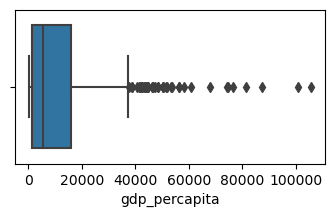

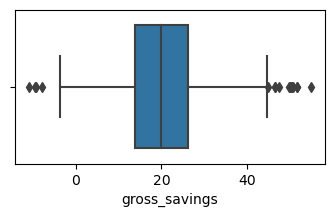

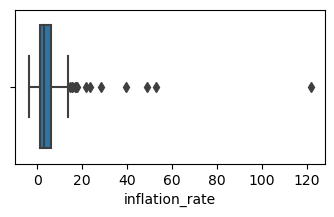

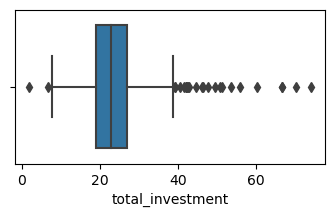

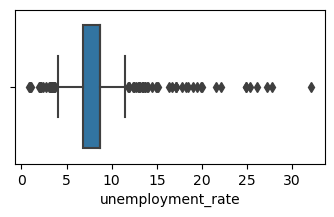

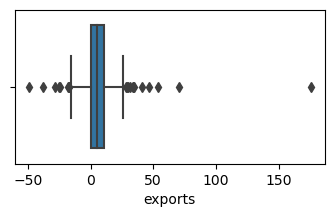

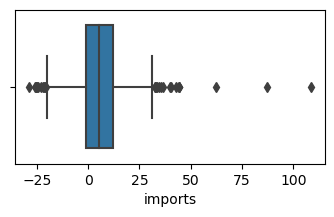

In [36]:
outliers('gdp_percapita')
outliers('gross_savings')
outliers('inflation_rate')
outliers('total_investment')
outliers('unemployment_rate')
outliers('exports')
outliers('imports')

# Dealing With Categorical Columns

In [37]:
categorical_columns.columns

Index(['code', 'year', 'income_group'], dtype='object')

In [38]:
def countplot(columns):
    plt.figure(figsize=(7,4))
    sns.countplot(data=df,x=columns)
    plt.show()

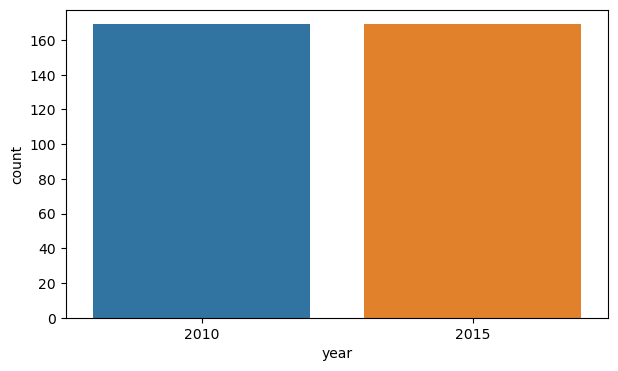

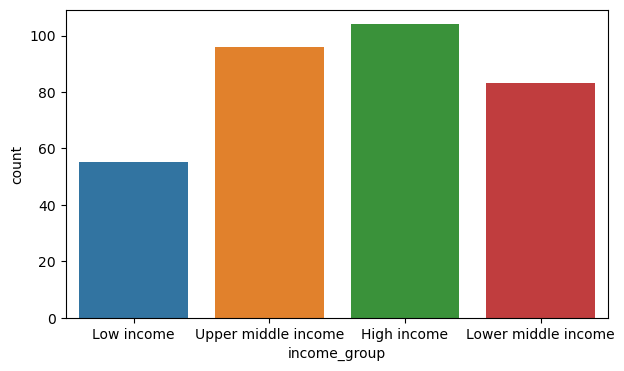

In [39]:
countplot('year')
countplot('income_group')

In [40]:
country = df['country_code'].value_counts()
country

AFG    2
NGA    2
MNG    2
MOZ    2
MRT    2
      ..
GHA    2
GIN    2
GMB    2
SSD    1
SYR    1
Name: country_code, Length: 170, dtype: int64

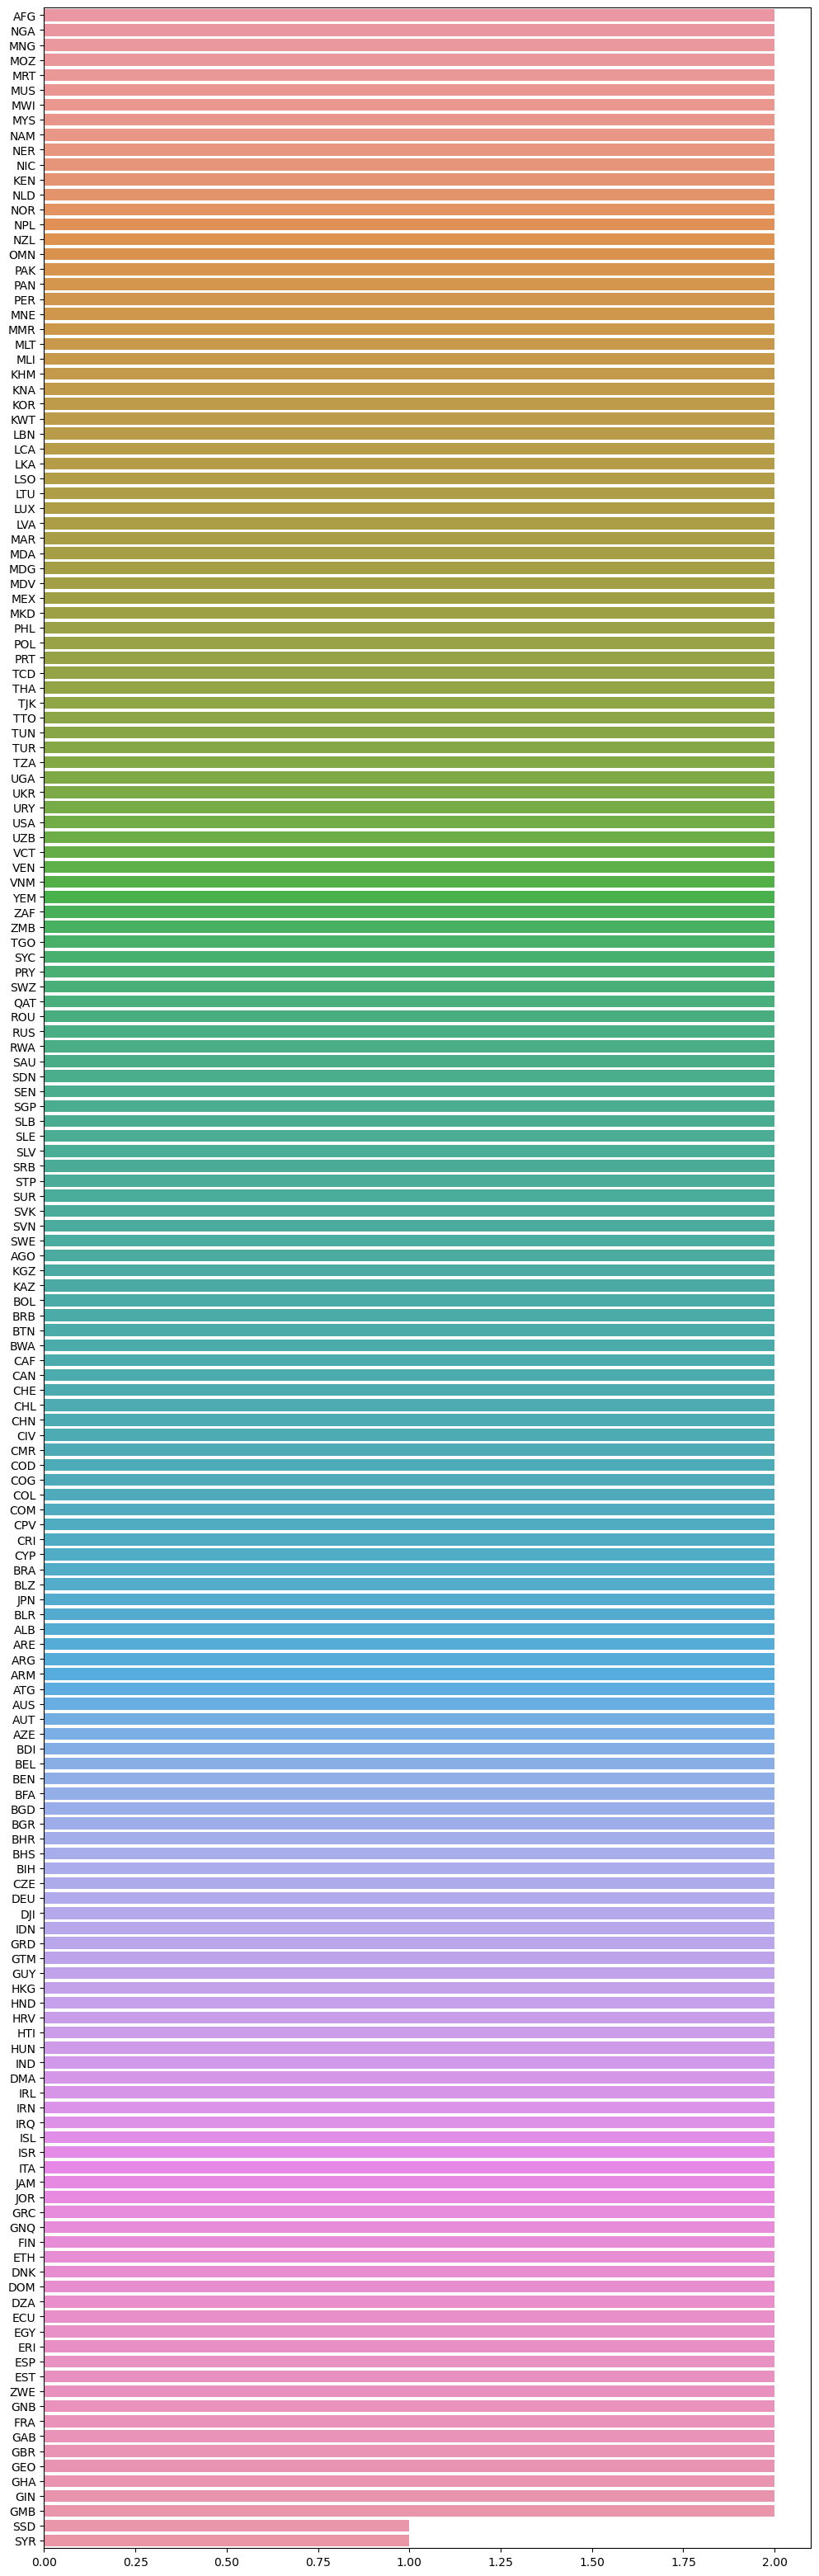

In [41]:
plt.figure(figsize=(12,40))
sns.barplot(y=country.index,x=country.values,data=df)
plt.show()

# Level 2

Q.1 Which Country has highest and lowest inflation rate

In [42]:
val = df.groupby('country_code')['inflation_rate'].mean().sort_values()
val

country_code
NER    -0.8900
IRL    -0.8265
KNA    -0.7255
LVA    -0.5055
VCT    -0.4870
        ...   
SDN    14.9500
YEM    25.2890
UKR    29.0245
SSD    52.8130
VEN    74.9625
Name: inflation_rate, Length: 170, dtype: float64

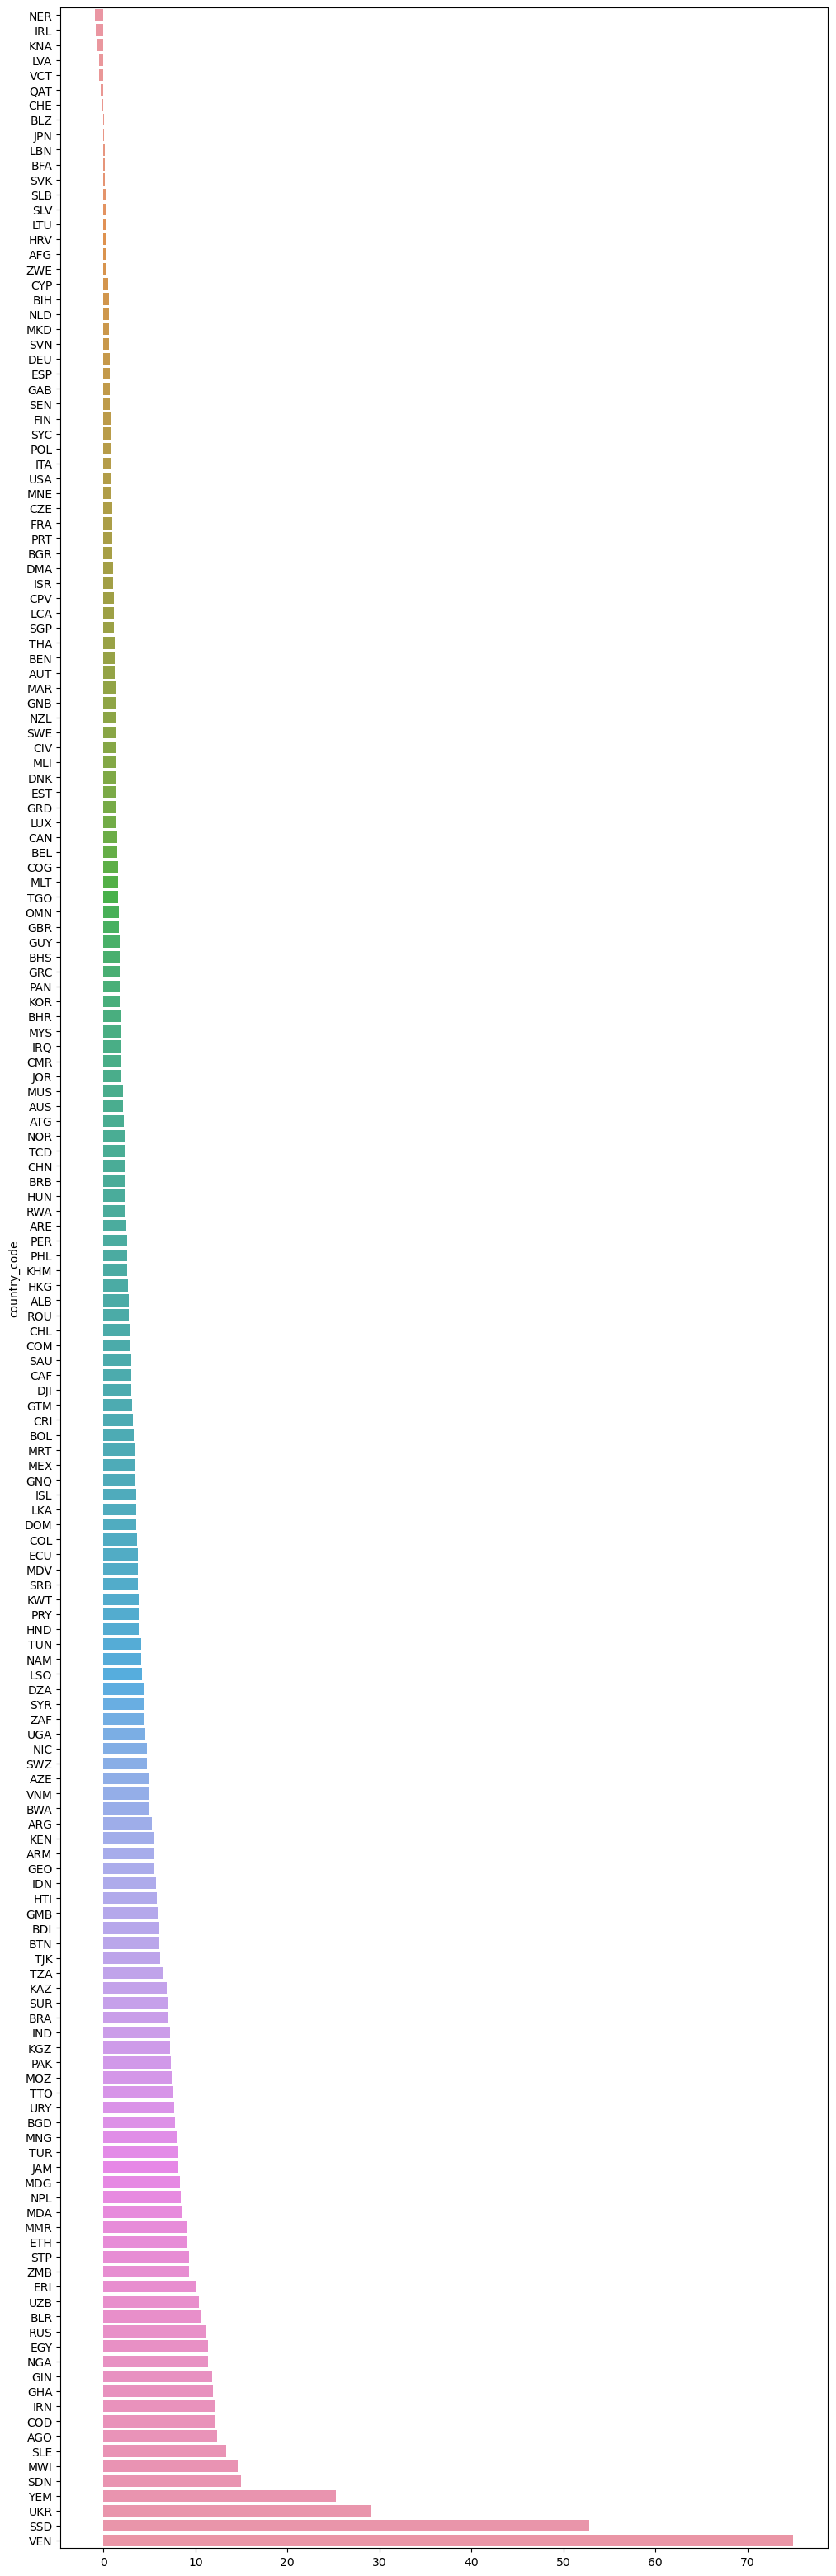

In [43]:
plt.figure(figsize=(12,40))
sns.barplot(y=val.index,x=val.values,data=df)
plt.show()

Ans-1 So NER has most negative inflation rate while VEN has most positive inflation rate.

Q.2 Find Inflation rate year wise.

In [44]:
val2 = df.groupby('year')['inflation_rate'].mean()
val2

year
2010    4.702805
2015    4.475006
Name: inflation_rate, dtype: float64

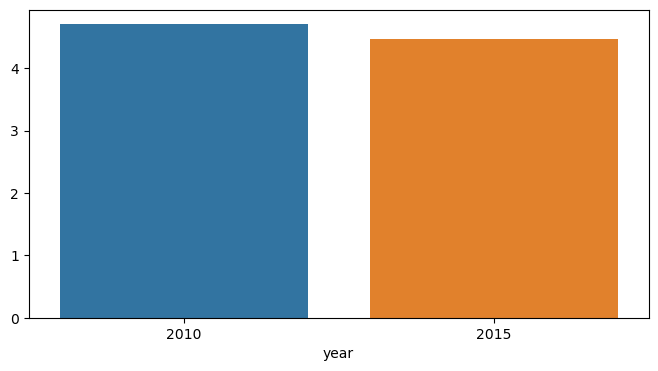

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(x=val2.index,y=val2.values,data=df)
plt.show()

<Axes: xlabel='year', ylabel='inflation_rate'>

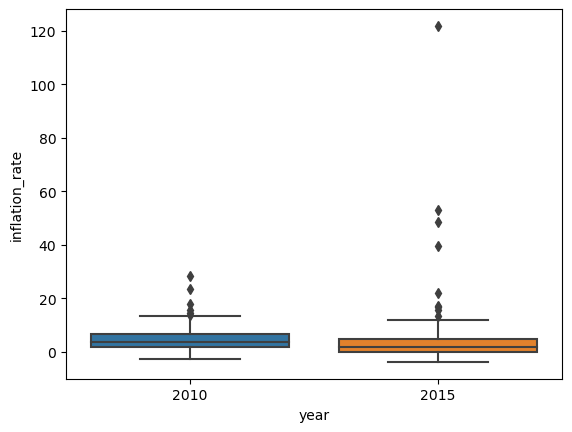

In [46]:
sns.boxplot(x='year',y='inflation_rate',data=df)

In [47]:
new_data = df[((df['year']==2010) & (df['inflation_rate']<12.0)) | ((df['year']==2015) & (df['inflation_rate']<10.0))]
new_data.shape

(311, 11)

<Axes: xlabel='year', ylabel='inflation_rate'>

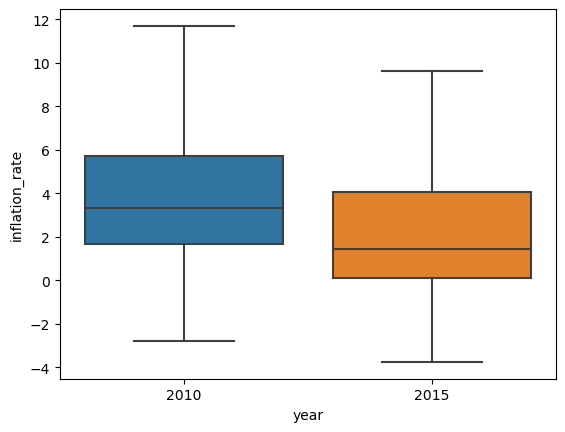

In [48]:
sns.boxplot(x='year',y='inflation_rate',data=new_data)

Ans-2 Year 2010 has high inflation rate

Q.3 Which Country has highest Unemployment Rate

In [49]:
val3 = new_data.groupby('country_code')['unemployment_rate'].mean().sort_values()

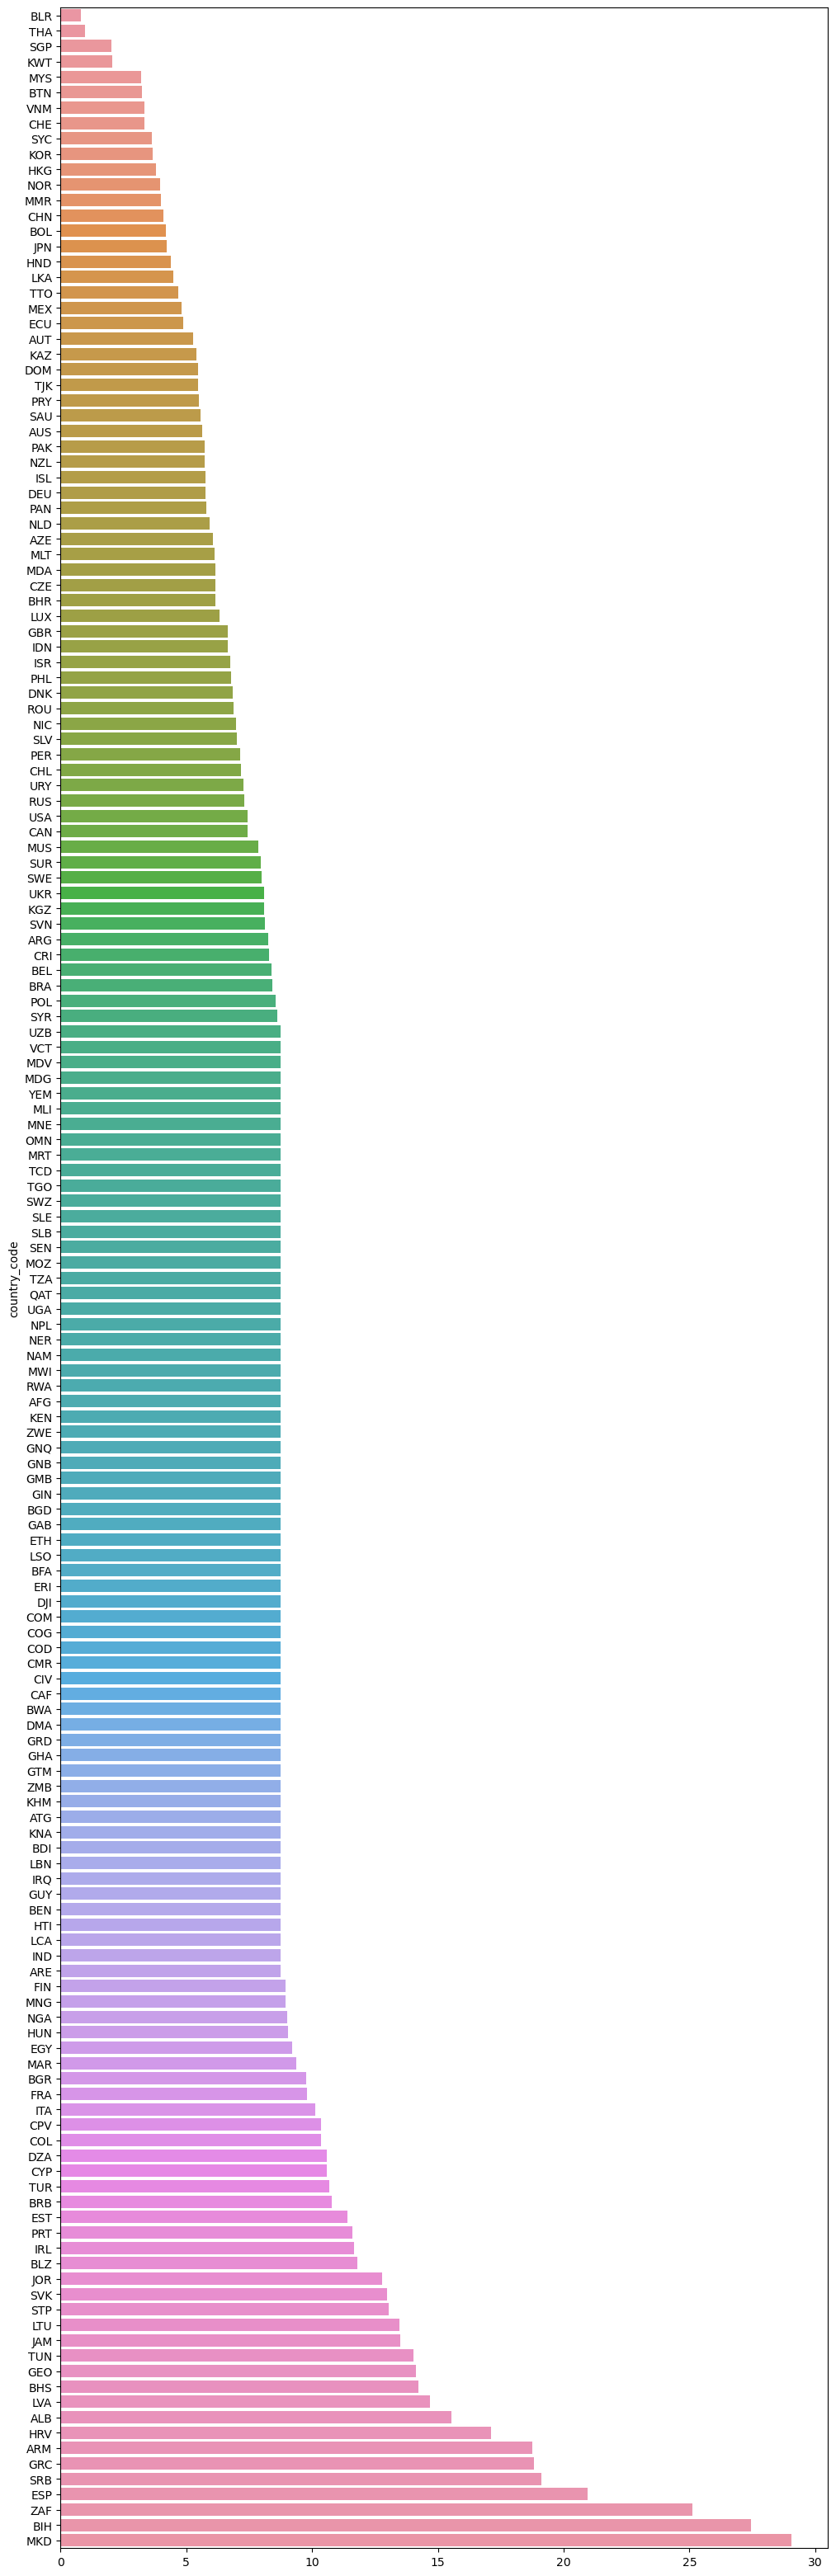

In [50]:
plt.figure(figsize=(12,40))
sns.barplot(y=val3.index,x=val3.values,data=new_data)
plt.show()

Ans-3 BLR has lowest unemployment rate where MKD has highest unemployment rate

Q.4 Find Gross Saving based on income group

In [51]:
val4 = new_data.groupby('income_group')['gross_savings'].mean()

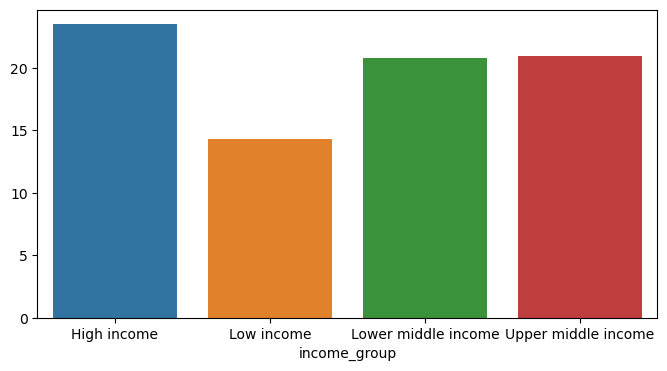

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(x=val4.index,y=val4.values,data=new_data)
plt.show()

In [53]:
val4_1 = new_data.groupby('income_group')['total_investment'].mean()

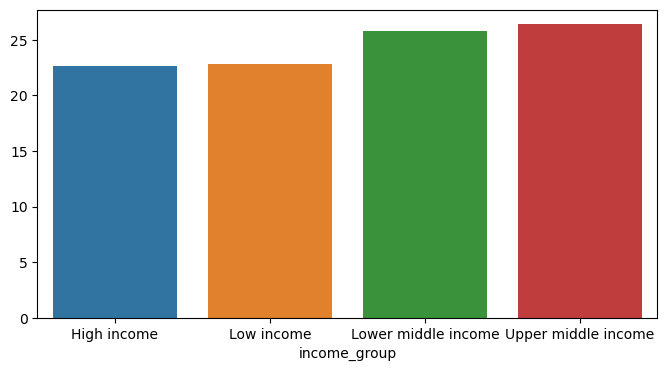

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(x=val4_1.index,y=val4_1.values,data=df)
plt.show()

<Axes: xlabel='income_group', ylabel='gross_savings'>

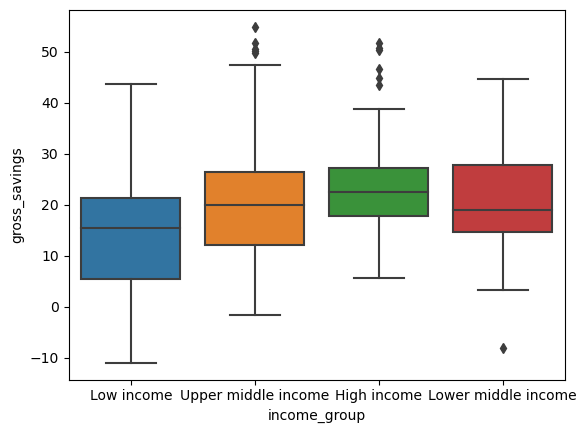

In [55]:
sns.boxplot(x='income_group',y='gross_savings',data=new_data)

<Axes: xlabel='income_group', ylabel='total_investment'>

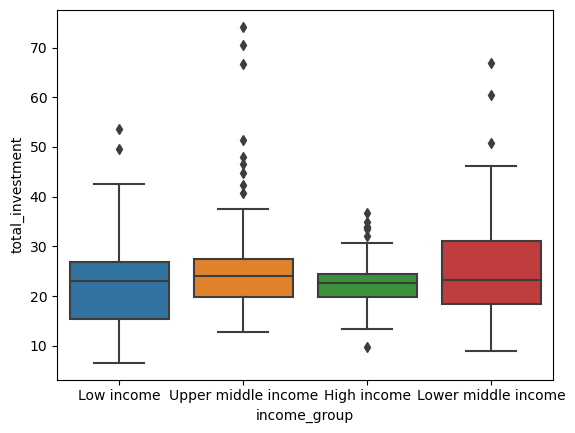

In [56]:
sns.boxplot(x='income_group',y='total_investment',data=new_data)

In [57]:
new_data2 = new_data[~((new_data['income_group']=='Upper middle income') &(new_data['gross_savings']>45.0)) & ~((new_data['income_group']=='High income') &(new_data['gross_savings']>38.0))]

<Axes: xlabel='income_group', ylabel='gross_savings'>

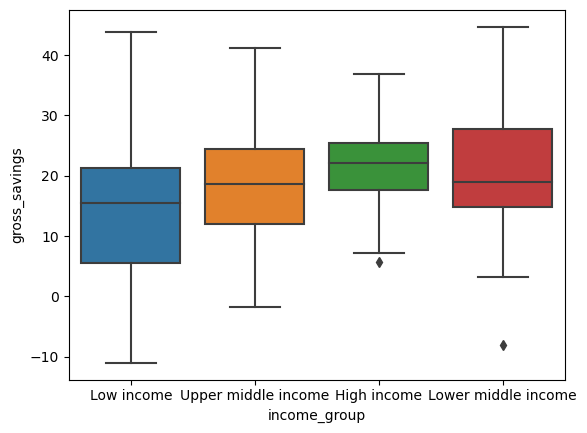

In [58]:
sns.boxplot(x='income_group',y='gross_savings',data=new_data2)

In [59]:
new_data3 = new_data2[~((new_data2['income_group']=='Lower income') &(new_data2['total_investment']>48.0)) & ~((new_data2['income_group']=='Upper middle income') &(new_data2['total_investment']>34.0)) & ~((new_data2['income_group']=='High income') &(new_data2['total_investment']>32.0)) & ~((new_data2['income_group']=='Lower middle income') &(new_data2['total_investment']>45.0))]
new_data3.shape

(279, 11)

<Axes: xlabel='income_group', ylabel='total_investment'>

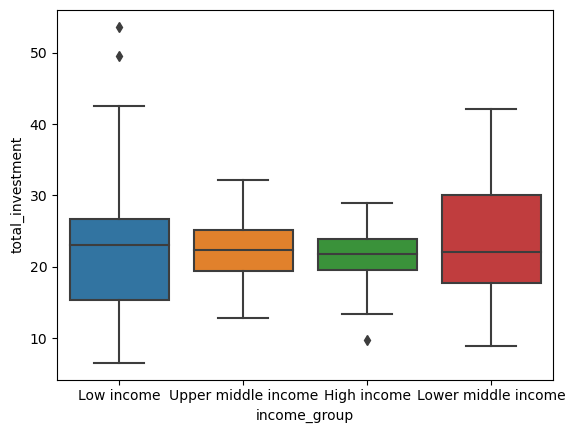

In [60]:
sns.boxplot(x='income_group',y='total_investment',data=new_data3)

Ans-4 High income group has highest gross savings while Upper middle group has highest total investment

Bar Plot :- In a bar plot, each bar represents a category (in this case, income groups), and the height of the bar represents a summary statistic (e.g., mean) of the variable you are visualizing (e.g., gross savings).
Bar plots are well-suited for showing the distribution of a variable across categories or groups. 

Box Plot:- A box plot displays the distribution of a variable in terms of its quartiles (median, lower quartile, and upper quartile) and potential outliers.
Box plots are useful for visualizing the spread and skewness of a distribution, including identifying outliers.

# Level 3

In [75]:
import statsmodels.api as sm

In [76]:
X1 = new_data3[['inflation_rate', 'total_investment', 'exports']]
y1 = new_data3['gdp_percapita']

In [77]:
X1 = sm.add_constant(X1)

In [78]:
model1 = sm.OLS(y1, X1).fit()

In [79]:
X2 = new_data3[['inflation_rate', 'total_investment', 'imports']]
y2 = new_data3['gdp_percapita']

In [80]:
X2 = sm.add_constant(X2)

In [81]:
model2 = sm.OLS(y2, X2).fit()

In [83]:
print("Model 1")
print(model1.summary())
print("Model 2")
print(model2.summary())

Model 1
                            OLS Regression Results                            
Dep. Variable:          gdp_percapita   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     10.41
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.64e-06
Time:                        16:35:18   Log-Likelihood:                -3116.6
No. Observations:                 279   AIC:                             6241.
Df Residuals:                     275   BIC:                             6256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.269e+04   38

# Level 4

In [88]:
X = new_data3[['gdp_percapita', 'inflation_rate', 'total_investment', 'exports']]

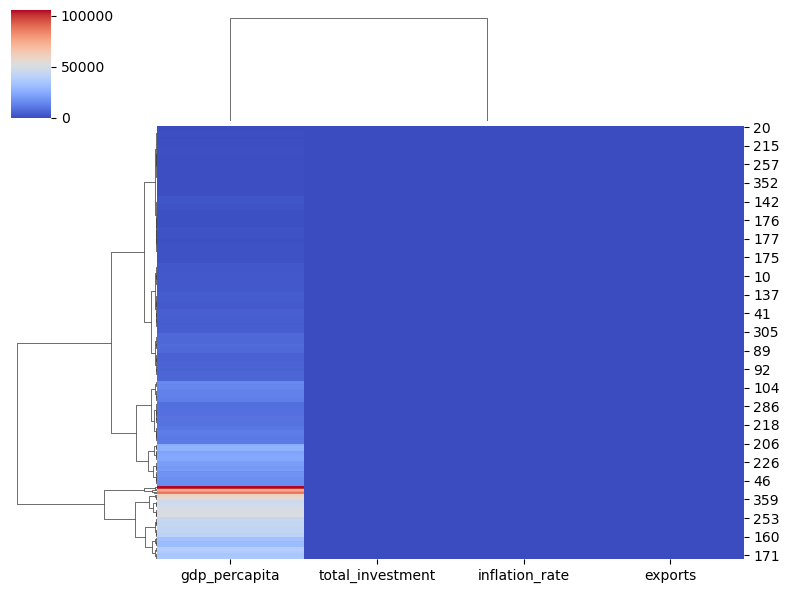

In [89]:
sns.clustermap(X, cmap="coolwarm", figsize=(8, 6), method='ward', metric='euclidean')
plt.show()